**OUTLIER DETECTION AND HANDLING - NUMERICAL DATA**

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set options to show all columns
pd.set_option('display.max_columns', None)

# Load csv file and generate pandas dataframe
input_csv = r'..\data\clean\after_step_3a_outliers_cat.csv' # Fill your path to file
df_1 = pd.read_csv(input_csv, sep = ',')

df_1.head()
df_1_shape = df_1.shape # Pass the shape of the dataframe to a variable for summary at end of the outlier detection and removal part


**Functions to use**

In [23]:
# This function get the stats (skew, mean, median, mode, count) and shows a boxplot to visualize the data and spot outliers

def num_data_stats(df, num_data_col):
    # to see outliers from Number_of_bedrooms in boxplot
    sns.boxplot(x=df[num_data_col], orient='h', color='#A3C9E2')
    plt.title(f'{num_data_col} - box plot for outlier detection')
    plt.xlabel(num_data_col)
    plt.show()

    # stats
    print(df[num_data_col].agg(['count','skew','mean','median']))
    print(df[num_data_col].mode())

    return

# This function does detection and removal of outliers via the Z method
def outliers_Z(df, num_data_col):
    upper_limit = df[num_data_col].mean() + 4*df[num_data_col].std()

    lower_limit = df[num_data_col].mean() - 4*df[num_data_col].std()

    print('upper limit:', upper_limit)
    print('lower limit:', lower_limit)

    # find the outlier

    df.loc[(df[num_data_col] > upper_limit) | (df[num_data_col] < lower_limit)]

    # remove outliers

    df_post_Z = df.loc[(df[num_data_col] < upper_limit) & (df[num_data_col] > lower_limit)]
    print('before removing outliers:', len(df))
    print('after removing outliers:', len(df_post_Z))
    print('outliers:', len(df) - len(df_post_Z))

    return df_post_Z

# This function does detection and removal of outliers via the IQR method
def outliers_IQR(df, num_data_col):

    # In this method, we determine quartile values ​​Q1 (25th percentile) and Q3 (75th percentile) and then cal
    # Outliers are those that fall outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]

    q1 = df[num_data_col].quantile(0.25)
    q3 = df[num_data_col].quantile(0.75)
    iqr = q3 - q1

    # Specifying the scope of outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Data filtering
    df_post_IQR = df[(df[num_data_col] >= lower_bound) & (df[num_data_col] <= upper_bound)]

    return df_post_IQR

*Number of bedrooms*
1. Stats and box plots prior to outlier detection and removal
2. Outlier detection and removal via IQR method --> removal of records
3. Stats and box plots after to outlier detection and removal

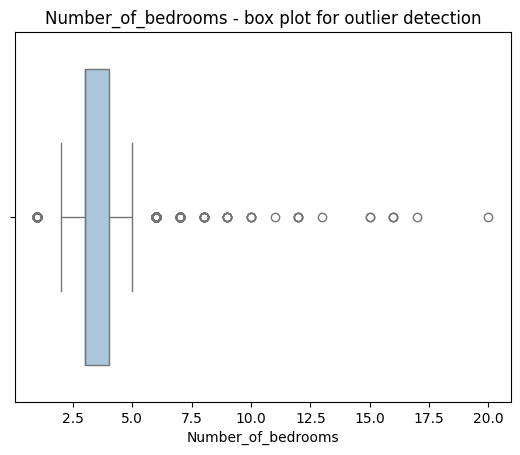

count     5756.000000
skew         2.682023
mean         3.469076
median       3.000000
Name: Number_of_bedrooms, dtype: float64
0    3
Name: Number_of_bedrooms, dtype: int64
upper limit: 8.278419529265408
lower limit: -1.3402680351722878
before removing outliers: 5756
after removing outliers: 5733
outliers: 23


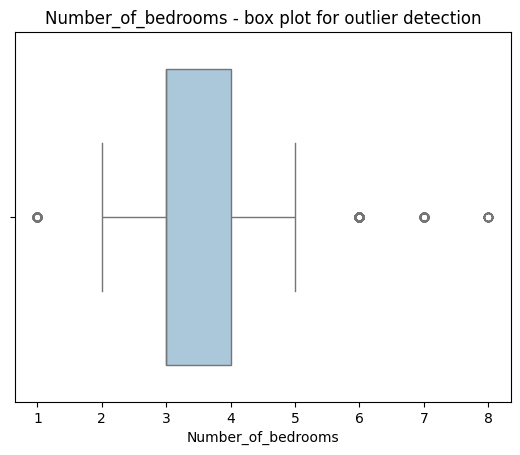

count     5733.000000
skew         0.845154
mean         3.433979
median       3.000000
Name: Number_of_bedrooms, dtype: float64
0    3
Name: Number_of_bedrooms, dtype: int64


In [24]:
num_data_col = 'Number_of_bedrooms' # Pass the correct data column to the function
df_pre = df_1 # Pass the correct dataframe to the function

# Call function to calculate stats on numerical data column and show boxplot. Provide df and num_data_col as parameter to the function.
num_data_stats(df_pre, num_data_col)

# Call function to detect and remove outliers via the IQR method.
df_post = outliers_Z(df_pre, num_data_col)

# Pass the output from the function 'outliers_IQR' to the function to ''num_data_stats' calculate stats on numerical data column and show boxplot. Provide df and num_data_col as parameter to the function.
num_data_stats(df_post, num_data_col)

# Copy dataframe contents to a new dataframe
df_2 = df_post.copy()

# Pass the output 
df_2_shape = df_2.shape # Pass the shape of the dataframe to a variable for summary at end of the outlier detection and removal part


*Living area*
1. Stats and box plots prior to outlier detection and removal
2. Outlier detection and removal via IQR method --> removal of records
3. Stats and box plots after to outlier detection and removal

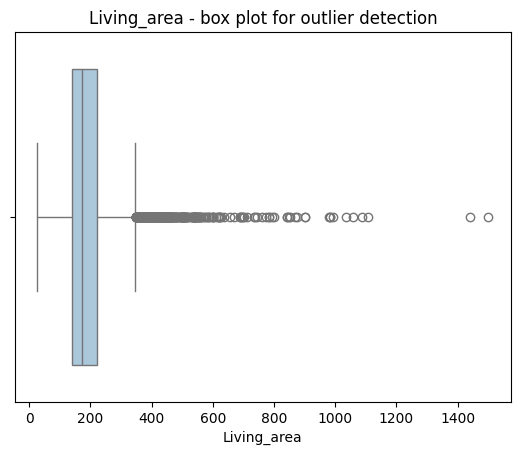

count     5733.000000
skew         3.414327
mean       196.354439
median     174.000000
Name: Living_area, dtype: float64
0    150
Name: Living_area, dtype: int64


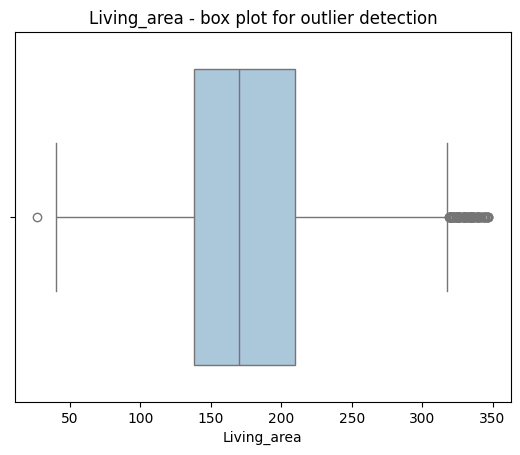

count     5377.000000
skew         0.607837
mean       177.695555
median     170.000000
Name: Living_area, dtype: float64
0    150
Name: Living_area, dtype: int64


In [25]:
num_data_col = 'Living_area' # Pass the correct data column to the function
df_pre = df_2 # Pass the correct dataframe to the function

# Call function to calculate stats on numerical data column and show boxplot. Provide df and num_data_col as parameter to the function.
num_data_stats(df_pre, num_data_col)

# Call function to detect and remove outliers via the IQR method.
df_post = outliers_IQR(df_pre, num_data_col)

# Pass the output from the function 'outliers_IQR' to the function to ''num_data_stats' calculate stats on numerical data column and show boxplot. Provide df and num_data_col as parameter to the function.
num_data_stats(df_post, num_data_col)

# Copy dataframe contents to a new dataframe
df_3 = df_post.copy()

# Pass the output 
df_3_shape = df_3.shape # Pass the shape of the dataframe to a variable for summary at end of the outlier detection and removal part


*Price*
1. Stats and box plots prior to outlier detection and removal
2. Outlier detection and removal via IQR method --> removal of records
3. Stats and box plots after to outlier detection and removal

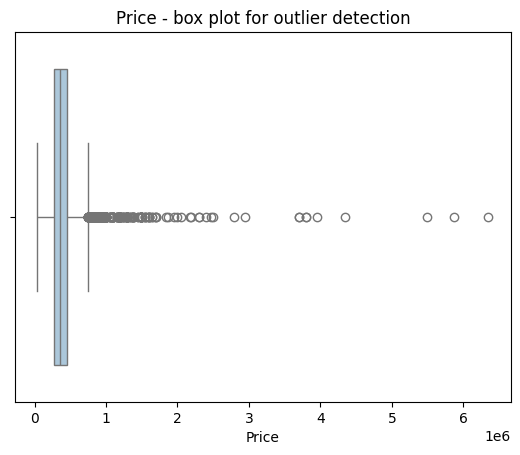

count       5377.000000
skew           7.786487
mean      403118.552911
median    355000.000000
Name: Price, dtype: float64
0    399000
Name: Price, dtype: int64


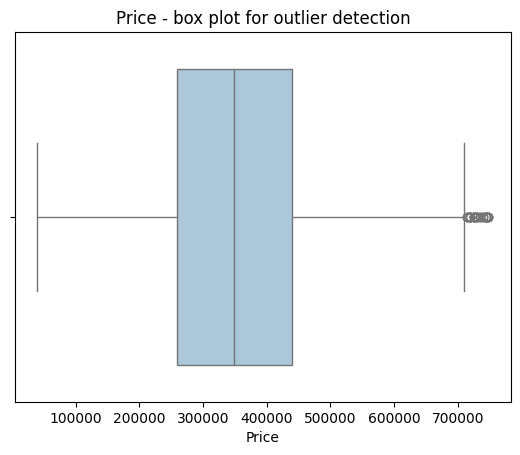

count       5086.000000
skew           0.487813
mean      359305.899528
median    349000.000000
Name: Price, dtype: float64
0    399000
Name: Price, dtype: int64


In [26]:
num_data_col = 'Price' # Pass the correct data column to the function
df_pre = df_3 # Pass the correct dataframe to the function

# Call function to calculate stats on numerical data column and show boxplot. Provide df and num_data_col as parameter to the function.
num_data_stats(df_pre, num_data_col)

# Call function to detect and remove outliers via the IQR method.
df_post = outliers_IQR(df_pre, num_data_col)

# Pass the output from the function 'outliers_IQR' to the function to ''num_data_stats' calculate stats on numerical data column and show boxplot. Provide df and num_data_col as parameter to the function.
num_data_stats(df_post, num_data_col)

# Copy dataframe contents to a new dataframe
df_4 = df_post.copy()

# Pass the output 
df_4_shape = df_4.shape # Pass the shape of the dataframe to a variable for summary at end of the outlier detection and removal part


*Price per sqm*
1. Stats and box plots prior to outlier detection and removal
2. Outlier detection and removal via IQR method --> removal of records
3. Stats and box plots after to outlier detection and removal

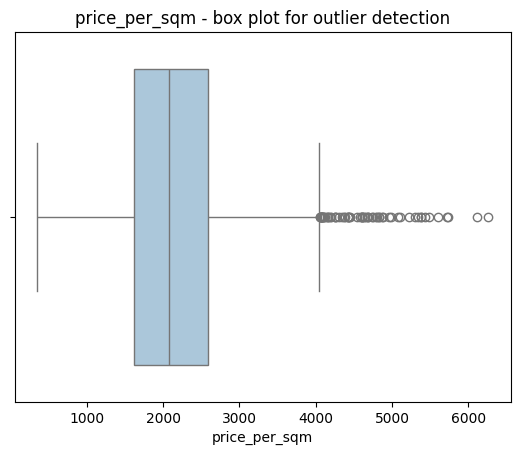

count     5086.000000
skew         0.695400
mean      2139.350409
median    2076.082022
Name: price_per_sqm, dtype: float64
0    2500.0
Name: price_per_sqm, dtype: float64


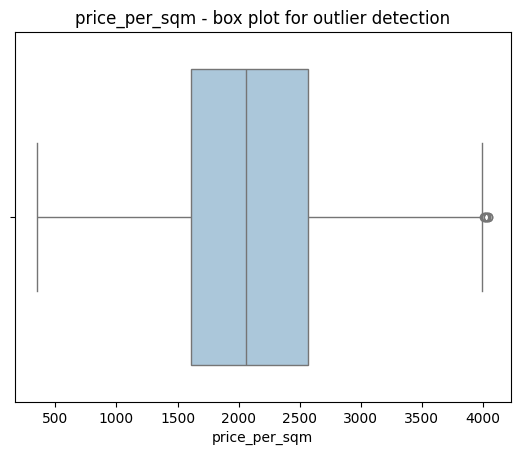

count     5021.000000
skew         0.281942
mean      2106.748201
median    2061.452514
Name: price_per_sqm, dtype: float64
0    2500.0
Name: price_per_sqm, dtype: float64


In [28]:
num_data_col = 'price_per_sqm' # Pass the correct data column to the function
df_pre = df_4 # Pass the correct dataframe to the function

# Call function to calculate stats on numerical data column and show boxplot. Provide df and num_data_col as parameter to the function.
num_data_stats(df_pre, num_data_col)

# Call function to detect and remove outliers via the IQR method.
df_post = outliers_IQR(df_pre, num_data_col)

# Pass the output from the function 'outliers_IQR' to the function to ''num_data_stats' calculate stats on numerical data column and show boxplot. Provide df and num_data_col as parameter to the function.
num_data_stats(df_post, num_data_col)

# Copy dataframe contents to a new dataframe
df_5 = df_post.copy()

# Pass the output 
df_5_shape = df_5.shape # Pass the shape of the dataframe to a variable for summary at end of the outlier detection and removal part


**Saving data to a new .csv file and a .pkl file**

In [29]:
# Save data to new csv file

output_csv = r'..\data\clean\after_step_3b_outliers_num.csv'  # Fill your path to file
df_5.to_csv(output_csv, index=False)


# Save data to new pkl file

import pickle
output_pkl = r'..\data\clean\after_step_3b_outliers_num.pkl' # Fill your path to file
with open(output_pkl, 'wb') as f:
    pickle.dump(df_5, f)

**Summary of outlier detection and handling operation:**

In [32]:
print("**Summary of outlier detection and handling operation:**")
print("Info on dataframe at start of the first cleaning step:")
df_1.info()

print("Dataframe shape at start: ", df_1_shape) 
print("Dataframe shape after outlier handling on nr of bedrooms: ", df_2_shape)
print("Dataframe shape after outlier handling on nr of bedrooms: ", df_3_shape)
print("Dataframe shape after outlier handling on nr of bedrooms: ", df_4_shape)
print("Dataframe shape after outlier handling on nr of bedrooms: ", df_5_shape)

print(f"The CSV file was saved as {output_csv}, as well as pickled to {output_pkl}.")
print("Info on dataframe at the end of the first cleaning step:")
df_5.info()

**Summary of outlier detection and handling operation:**
Info on dataframe at start of the first cleaning step:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5756 entries, 0 to 5755
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5756 non-null   int64  
 1   locality_name       5756 non-null   object 
 2   Postal_code         5756 non-null   int64  
 3   Price               5756 non-null   int64  
 4   Subtype             5756 non-null   object 
 5   Number_of_bedrooms  5756 non-null   int64  
 6   Living_area         5756 non-null   int64  
 7   street              5756 non-null   object 
 8   number              5738 non-null   object 
 9   latitude            5753 non-null   float64
 10  longitude           5753 non-null   float64
 11  Open_fire           5756 non-null   int64  
 12  Swimming_Pool       5756 non-null   int64  
 13  hasTerrace          5756 non-null   int64